In [9]:
import json
import tweepy
import pandas as pd

auth = tweepy.OAuthHandler([REDACTED], [REDACTED])
auth.set_access_token([REDACTED], [REDACTED])

api = tweepy.API(auth)
members = []
names = []
for member in tweepy.Cursor(api.list_members
                            , 'cspan'
                            , 'members-of-congress').items():
    members.append(member.screen_name)
    names.append(member.name)

congress = pd.DataFrame(data={'Name':names,'Twitter':members})
congress.to_csv('./congress.csv')

In [11]:
congress = pd.read_csv('./congress.csv'
                       , encoding = 'latin-1')
congress.head()

,Name,Congress,State,District,Year,Seniority,Party,Twitter
0,Abby Finkenauer,H,Iowa,1,1/3/2019,0,D,RepFinkenauer
1,Abigail Spanberger,H,Virginia,7,1/3/2019,0,D,RepSpanberger
2,Adam Kinzinger,H,New York,14,1/3/2019,0,D,RepKinzinger
3,Adam Schiff,H,New Jersey,3,1/3/2019,0,D,RepAdamSchiff
4,Adrian Smith,H,Michigan,9,1/3/2019,0,D,RepAdrianSmith


In [12]:
congress.describe()

,District,Seniority
count,527.000000,527.000000
mean,8.248577,8.191651
std,10.465264,8.436482
min,0.000000,0.000000
25%,1.000000,2.000000
50%,4.000000,6.000000
75%,11.000000,12.000000
max,53.000000,46.000000


In [68]:
# tk, tk2, tka, tka2 are redacted App API Keys from Twitter Developer
auth = tweepy.OAuthHandler(tk, tk2)
auth.set_access_token(tka, tka2)

api = tweepy.API(auth)
import datetime
import time
from tqdm import tqdm_notebook as tqdm
import re
import emoji

RE_EMOJI = emoji.get_emoji_regexp()

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

for member in congress['Twitter']:
    while True:
        try:
            tweets = []
            with open("./congress/"+member+".txt", "wb") as text_file:
                for status in tweepy.Cursor(api.user_timeline
                                        , id=member
                                        , tweet_mode='extended').items(200):
                    text = status.full_text.replace(
                        '\n','').translate(non_bmp_map)
                    text = ' '.join(
                        word for word in text.split(' ') if 'http' not in word)
                    text = ' '.join(
                        word for word in text.split(' ') if '&amp' not in word)
                    text = strip_emoji(text+'\n').encode('utf-8')
                    tweets.append(text)
                    text_file.write(text)
            print(member, len(tweets))
        except:
            print("Rate limit exceeded")
            for i in tqdm(range(60*15)):
                time.sleep(1)
            continue
        break

RepFinkenauer 85
RepSpanberger 200
RepKinzinger 200
RepAdamSchiff 200
RepAdrianSmith 200
RepEspaillat 200
RepAlGreen 200
RepLowenthal 200
RepSires 200
RepHastingsFL 200
RepAlexMooney 200
RepAOC 16
RepAlLawsonJr 200
RepAdams 200
RepAmata 200
RepBera 200
SenAmyKlobuchar 200
RepAndreCarson 200
RepAndyHarrisMD 200
RepAndyKimNJ 110
RepAndyBarr 200
RepAndyBiggsAZ 200
RepAndyLevin 170
RepAngieCraig 163
SenAngusKing 200
RepKirkpatrick 200
RepAnnWagner 200
RepAnnaEshoo 200
RepAnnieKuster 200
RepBrindisi 199
RepAGonzalez 101
repdelgado 200
RepMcEachin 200
AustinScottGA08 200
RepPressley 200
RepBarbaraLee 200
RepLoudermilk 200
SenatorCardin 200
RepBenMcAdams 200
repbenraylujan 200
SenSasse 200
RepBenCline 84
BennieGThompson 200
SenSanders 200
BettyMcCollum04 200
SenBillCassidy 200
RepBillFlores 200
RepBillFoster 200
RepHuizenga 200
RepBillJohnson 200
USRepKeating 200
BillPascrell 200
congbillposey 200
USRepLong 200
RepBlaine 200
SenBobCasey 200
RepBobGibbs 200
boblatta 200
SenatorMenendez 200
Rep

A Jupyter Widget

RepMaloney 200
SenCortezMasto 200
cathymcmorris 200
RepRichmond 200
RepChuck 200
RepCharlieCrist 200
chelliepingree 200
RepCheri 200
RepChipRoy 200
RepChrisCollins 200
ChrisCoons 200
RepChrisPappas 200
RepChrisSmith 200
RepChrisStewart 200
ChrisVanHollen 200
RepHoulahan 200
ChrisMurphyCT 200
ChuckGrassley 200
SenSchumer 200
RepCindyAxne 161
SenHydeSmith 200
RepClayHiggins 200
RepColinAllred 145
RepConorLamb 162
SenBooker 200
SenCoryGardner 200
RepAdamSmith 200
RepDanKildee 200
RepMeuser 108
RepNewhouse 200
RepDanCrenshaw 118
RepLipinski 200
SenDanSullivan 200
RepWebster 200
RepDannyDavis 200
RepLaHood 200
RepDarrenSoto 200
daveloebsack 200
RepDaveJoyce 200
RepDavidKustoff 200
RepMcKinley 200
davidcicilline 200
sendavidperdue 200
RepDavidEPrice 200
RepDavidRouzer 200
RepDavid 200
repdavidscott 200
RepDavidTrone 153
RepDeanPhillips 99
SenatorFischer 200
RepDebDingell 200
RepDLesko 200
RepDMP 200
SenStabenow 200
RepDWStweets 200
RepDebHaaland 200
RepDennyHeck 200
RepRiggleman 200
RepDerek

A Jupyter Widget

repcleaver 200
RepSwalwell 200
JimPressOffice 200
RepFilemonVela 200
RepRooney 200
RepFrankLucas 200
FrankPallone 200
RepFredUpton 200
RepWilson 200
RepFrenchHill 200
GKButterfield 200
RepGarretGraves 200
USRepGaryPalmer 200
SenGaryPeters 200
RepHolding 200
GerryConnolly 200
RepGilCisneros 200
RepGrothman 200
CongressmanGT 200
RepGusBilirakis 200
RepGraceMeng 200
gracenapolitano 200
RepGregPence 130
RepGregStanton 76
RepGregSteube 73
repgregwalden 200
RepGregoryMeeks 200
GReschenthaler 200
RepGwenMoore 200
RepMGriffith 200
RepJeffries 200
RepHalRogers 200
RepHaleyStevens 200
RepHankJohnson 200
RepHarley 198
RepCuellar 200
Ilhan 200
SenJackReed 200
RepSpeier 200
RepWalorski 200
SenJackyRosen 200
RepJahanaHayes 200
HerreraBeutler 200
WhipClyburn 200
KYComer 200
SenatorLankford 200
RepRaskin 200
janschakowsky 200
RepGolden 163
RepHuffman 200
RepJasonCrow 200
RepJasonSmith 200
SenatorShaheen 200
RepJeffDuncan 200
SenJeffMerkley 200
CongressmanJVD 95
JeffFortenberry 200
RepWexton 200
RepJen

A Jupyter Widget

RepJohnKatko 200
RepJohnLarson 200
repjohnlewis 200
RepMoolenaar 200
SenJohnKennedy 200
RepRatcliffe 200
RepJohnRose 52
RepRutherfordFL 200
RepSarbanes 200
RepShimkus 200
SenJohnThune 200
SenatorIsakson 200
SenatorTester 200
SenJoniErnst 200
RepJoseSerrano 200
RepJoeKennedy 200
RepJoeMorelle 200
RepJoshG 200
RepJoshHarder 123
SenHawleyPress 95
RepBeatty 200
RepJuanVargas 200
RepJudyChu 200
RepBrownley 200
justinamash 200
SenKamalaHarris 200
RepKarenBass 200
RepKClark 200
RepKathleenRice 200
USRepKCastor 200
RepKatieHill 200
RepKatiePorter 176
RepKayGranger 200
RepArmstrongND 119
RepKenBuck 200
KenCalvert 200
RepKendraHorn 75
RepKenMarchant 200
RepKevinBrady 200
SenKevinCramer 200
repkevinhern 98
GOPLeader 200
RepKimSchrier 94
gillibrandny 200
RepSchrader 200
SenatorSinema 200
SenAlexander 200
RepLanceGooden 49
RepLarryBucshon 200
RepUnderwood 124
RepLeeZeldin 200
RepLindaSanchez 200
LindseyGrahamSC 200
RepLBR 200
lisamurkowski 200
RepLizCheney 200
RepFletcher 152
RepLloydDoggett 200
Re

A Jupyter Widget

SenatorBennet 200
michaelcburgess 200
RepCloudTX 46
USRepMikeDoyle 200
RepMichaelGuest 125
CongMikeSimpson 200
RepMcCaul 200
RepMikeTurner 200
RepMichaelWaltz 200
RepBost 200
SenatorBraun 150
ConawayTX11 200
MikeCrapo 200
SenatorEnzi 200
RepGallagher 200
RepMikeJohnson 200
MikeKellyPA 200
SenMikeLee 200
RepMikeLevin 176
RepMikeQuigley 200
RepMikeRogersAL 200
SenatorRounds 200
RepThompson 200
RepSherrill 161
senatemajldr 200
SenatorRomney 118
RepMoBrooks 200
SpeakerPelosi 200
RepBarragan 200
DrNealDunnFL2 200
NitaLowey 200
NormaJTorres 200
NydiaVelazquez 200
SenPatRoberts 200
SenToomey 200
SenatorLeahy 200
PatrickMcHenry 200
PattyMurray 200
RepPaulCook 200
RepGosar 200
RepPaulMitchell 200
RepPaulTonko 200
RepPeteAguilar 200
RepPeteStauber 108
RepPeterDeFazio 200
RepPeteOlson 200
RepPeteKing 200
RepVisclosky 200
PeterWelch 200
DrPhilRoe 200
RepJayapal 200
CongressmanRaja 200
RepAbraham 200
RepRalphNorman 200
RandPaul 200
TXRandy14 200
RepRashida 128
RepRaulGrijalva 200
CongressmanRuiz 20

A Jupyter Widget

RepTipton 200
RepCasten 200
RepSeanDuffy 200
RepSeanMaloney 200
sethmoulton 200
RepDavids 200
JacksonLeeTX18 200
SenWhitehouse 200
SenCapito 200
SenSherrodBrown 200
LeaderHoyer 200
RepStephMurphy 200
RepStephenLynch 200
RepSteveChabot 200
RepCohen 200
SteveDaines 200
SteveKingIA 200
SteveScalise 200
RepSteveStivers 200
Rep_Watkins 127
rep_stevewomack 200
RepHorsford 200
CongPalazzo 200
SusanWBrooks 200
SenatorCollins 200
RepSusanDavis 200
RepSusanWild 200
RepSusieLee 200
RepDelBene 200
RepBonamici 200
RepSylviaGarcia 200
SenatorBaldwin 200
SenDuckworth 200
RepTedBudd 200
SenTedCruz 200
RepTedLieu 200
RepTedYoho 200
RepTerriSewell 200
RepTedDeutch 200
SenThomTillis 200
RepThomasMassie 200
RepTimBurchett 105
timkaine 200
RepTimRyan 200
SenatorTimScott 200
RepWalberg 200
SenTinaSmith 200
RepTjCox 200
SenToddYoung 200
SenatorCarper 200
TomColeOK04 200
SenTomCotton 200
RepTomEmmer 200
RepTomGraves 200
RepMalinowski 45
RepMcClintock 200
RepOHalleran 200
RepTomReed 200
RepTomRice 200
RepTomSu

In [74]:
import os

reattempt = ['RepFinkenauer','RepAOC','RepAndyKimNJ','RepAndyLevin'
             ,'RepAngieCraig','RepBrindisi','RepAGonzalez','RepBenCline'
             ,'RepBryanSteil','RepCarolMiller','RepCindyAxne'
             ,'RepColinAllred','RepConorLamb','RepDanCrenshaw','RepDavidTrone'
             ,'RepDevinNunes','RepDustyJohnson','RepEdCase','RepSlotkin'
             ,'RepGregPence','RepGregStanton','RepGregSteube','RepHarley'
             ,'RepGolden','CongressmanJVD','RepChuyGarcia','RepHagedorn'
             ,'RepCunningham','RepJohnJoyce','RepJohnRose','RepJoshHarder'
             ,'RepKatiePorter','RepArmstrongND','RepKendraHorn','repkevinhern'
             ,'RepKimSchrier','RepLanceGooden','RepUnderwood','RepFletcher'
             ,'RepLucyMcBath','RepMaxRose','RepCloudTX','SenatorBraun'
             ,'RepMikeLevin','RepSherrill','SenatorRomney','RepPeteStauber'
             ,'RepRashida','RepRobBishop','RepMarshall','RepRonWright'
             ,'RepRussFulcher','Rep_Watkins','RepTimBurchett','RepMalinowski'
             ,'RepBalderson','RepVanTaylor','reptimmons','RepTorresSmall']

for member in reattempt:
    os.remove("./congress/"+member+".txt")
    while True:
        try:
            tweets = []
            with open("./congress/"+member+".txt", "wb") as text_file:
                for status in tweepy.Cursor(api.user_timeline
                                        , id=member
                                        , tweet_mode='extended').items(200):
                    text = status.full_text.replace(
                        '\n','').translate(non_bmp_map)
                    text = ' '.join(
                        word for word in text.split(' ') if 'http' not in word)
                    text = ' '.join(
                        word for word in text.split(' ') if '&amp' not in word)
                    text = strip_emoji(text+'\n').encode('utf-8')
                    tweets.append(text)
                    text_file.write(text)
            print(member, len(tweets))
        except:
            print("Rate limit exceeded")
            for i in tqdm(range(60*15)):
                time.sleep(1)
            continue
        break

RepFinkenauer 85
RepAOC 16
RepAndyKimNJ 111
RepAndyLevin 170
RepAngieCraig 163
RepBrindisi 199
RepAGonzalez 101
RepBenCline 84
RepBryanSteil 150
RepCarolMiller 105
RepCindyAxne 161
RepColinAllred 145
RepConorLamb 162
RepDanCrenshaw 118
RepDavidTrone 153
RepDevinNunes 154
RepDustyJohnson 110
RepEdCase 72
RepSlotkin 138
RepGregPence 130
RepGregStanton 76
RepGregSteube 74
RepHarley 198
RepGolden 163
CongressmanJVD 95
RepChuyGarcia 128
RepHagedorn 103
RepCunningham 169
RepJohnJoyce 131
RepJohnRose 52
RepJoshHarder 123
RepKatiePorter 177
RepArmstrongND 119
RepKendraHorn 75
repkevinhern 98
RepKimSchrier 94
RepLanceGooden 49
RepUnderwood 124
RepFletcher 152
RepLucyMcBath 76
RepMaxRose 175
RepCloudTX 46
SenatorBraun 150
RepMikeLevin 176
RepSherrill 161
SenatorRomney 118
RepPeteStauber 108
RepRashida 128
RepRobBishop 0
RepMarshall 0
RepRonWright 107
RepRussFulcher 50
Rep_Watkins 127
RepTimBurchett 105
RepMalinowski 45
RepBalderson 129
RepVanTaylor 55
reptimmons 41
RepTorresSmall 79


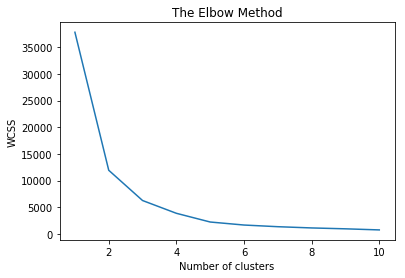

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

congress = pd.read_csv('./congress.csv', encoding = 'latin-1')
c50 = pd.read_csv('./mallet/50-congress-topics.csv', encoding = 'latin-1')

congress = congress.merge(c50, on="twitter")

X = congress.iloc[:,2:]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [97]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
congress['cluster'] = kmeans.fit_predict(X)
congress.to_csv('./congress2.csv')

In [99]:
X.head()

,Republican,Democrat,Congress,Seniority,50_c0,50_c1,50_c2,50_c3,50_c4,50_c5,...,50_c40,50_c41,50_c42,50_c43,50_c44,50_c45,50_c46,50_c47,50_c48,50_c49
0,1,0,1,8,0.000009,0.000023,0.000007,0.000009,0.000005,0.000011,...,0.000107,0.000014,0.000006,0.119941,0.023519,0.000007,0.000010,0.000051,0.000060,0.000081
1,1,0,1,8,0.000013,0.000032,0.000010,0.000012,0.014366,0.000016,...,0.000600,0.000020,0.000008,0.066160,0.001078,0.000010,0.000015,0.000072,0.001880,0.000115
2,0,1,1,8,0.000011,0.013607,0.000009,0.000011,0.000006,0.000014,...,0.001683,0.000017,0.000007,0.187946,0.022270,0.000008,0.000013,0.000062,0.000074,0.040836
3,1,0,1,16,0.000009,0.000024,0.015297,0.000009,0.000005,0.000012,...,0.027368,0.000015,0.000006,0.106178,0.000134,0.002666,0.000011,0.000053,0.000728,0.000085
4,1,0,0,17,0.000013,0.017745,0.000011,0.000013,0.000007,0.000016,...,0.076129,0.001885,0.000009,0.134437,0.027220,0.000010,0.000016,0.012659,0.000089,0.024822
